In [82]:

%matplotlib inline
%matplotlib notebook


import pandas as pd 
import boto3
import h5py
import numpy as np
import os
import tables
import pickle
import geopandas
import sklearn
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell


def load_checkpoint():
    with open('master_df.pickle', 'rb') as handle:
        return pickle.load(handle)

# Do not uncomment this unless you want to save a new version of the master dataframe
# save_checkpoint(master_df)

master_df = load_checkpoint()

C:\Users\venka\AppData\Roaming\Python\Python38\site-packages\pyproj\crs\crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


In [2]:
#Kmeans-CLustering with all 3 DF 

In [4]:

import pandas
import geopandas 
from geopandas import GeoDataFrame
import numpy
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt

K_mean = pd.DataFrame(master_df)
K_mean =  K_mean.drop(columns=['lat','lon'])
K_means_D = K_mean.drop(columns=['geometry'])
K_means_D.head()


,2000_ACond_tavg,2000_Albedo_inst,2000_AvgSurfT_inst,2000_CanopInt_inst,2000_ECanop_tavg,2000_ESoil_tavg,2000_Evap_tavg,2000_LWdown_f_tavg,2000_Lwnet_tavg,2000_Psurf_f_inst,...,2007_ncrunnat,2008_ncrunnat,2009_ncrunnat,2010_ncrunnat,2011_ncrunnat,2012_ncrunnat,2013_ncrunnat,2014_ncrunnat,2015_ncrunnat,2016_ncrunnat
0,0.016219,39.998020,261.982452,0.028931,2.330008,15.343687,0.000009,229.330368,-40.808914,96087.843750,...,0.000014,0.000015,0.000024,0.000019,0.000029,0.000019,0.000016,0.000025,0.000026,0.000019
1,0.016937,40.676281,262.283844,0.036311,2.233058,15.203341,0.000009,229.323456,-41.955399,97696.539062,...,0.000012,0.000012,0.000020,0.000015,0.000024,0.000017,0.000013,0.000022,0.000022,0.000018
2,0.018806,39.602760,263.464081,0.022502,1.618066,16.863810,0.000009,238.398178,-36.413322,96537.195312,...,0.000011,0.000007,0.000019,0.000014,0.000023,0.000012,0.000011,0.000018,0.000018,0.000017
3,0.017559,40.260284,263.129944,0.031821,2.382056,14.701731,0.000009,235.138351,-38.987770,99150.906250,...,0.000006,0.000006,0.000011,0.000008,0.000013,0.000010,0.000007,0.000013,0.000013,0.000010
4,0.019091,39.242260,263.903259,0.020268,1.530059,16.375177,0.000009,238.532364,-37.810936,97135.523438,...,0.000010,0.000006,0.000016,0.000012,0.000019,0.000011,0.000009,0.000016,0.000016,0.000017


In [5]:
#################################Elbow Method to determine clusters#####################################################
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(K_means_D)
    wcss.append(kmeans.inertia_)
print(wcss)

<ipython-input-5-9fec7d36872f>:5: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  kmeans.fit(K_means_D)
<ipython-input-5-9fec7d36872f>:5: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  kmeans.fit(K_means_D)


[1.3868114066884393e+43, 1.3875000556134352e+42, 78193284169534.22, 71885477829584.69, 71003885759978.89, 33373160131747.54, 21468583284654.637, 20464485551324.125, 20364808260054.336, 20357451315888.777, 20332048735666.312, 14111536187648.5, 13658199493671.604, 13695081335650.879]


<ipython-input-5-9fec7d36872f>:5: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  kmeans.fit(K_means_D)


<IPython.core.display.Javascript object>


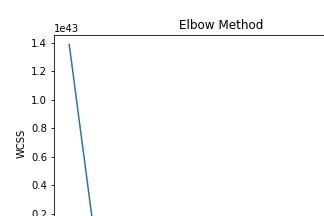

In [7]:
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#All Data World Clustering 

In [8]:
kmeans = KMeans(n_clusters=15)
numpy.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(K_means_D)
k5cls.labels_

# Assign labels into a column
K_mean['k5cls'] = k5cls.labels_
K_mean = GeoDataFrame(K_mean)
# Setup figure and ax


<ipython-input-8-7e190681d0c1>:4: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  k5cls = kmeans.fit(K_means_D)


<IPython.core.display.Javascript object>


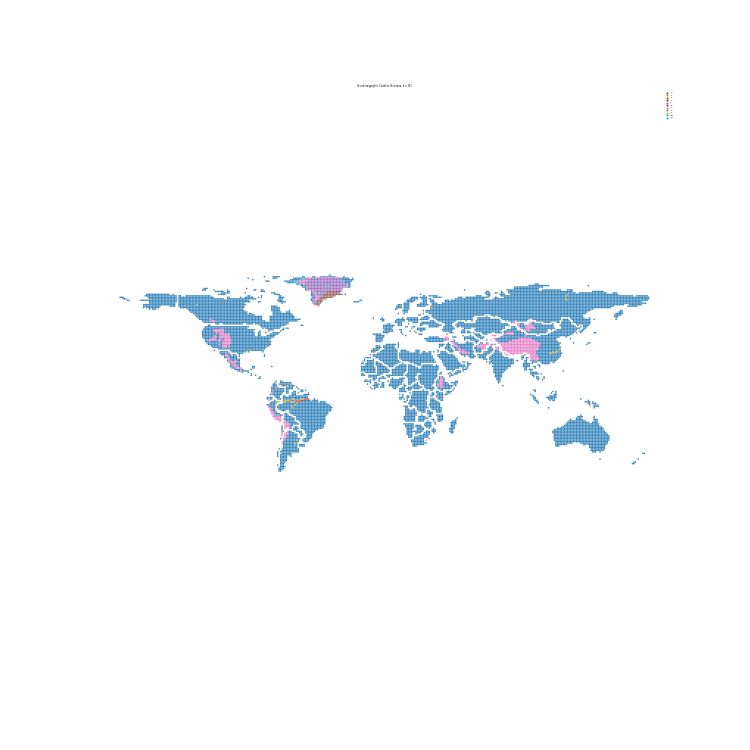

In [13]:
f, ax = plt.subplots(1, figsize=(50, 50), dpi = 15)
# Plot unique values choropleth including a legend and with no boundary lines
K_mean.plot(column='k5cls', categorical=True, legend=True,  ax=ax)
# Remove axis
ax.set_axis_off()
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title(r'Geodemographic Clusters (k-means, $k=15$)')
# Display the map
plt.show()


# Clustering with all years and features :- country Specific 

In [ ]:
##K-means Clustering Country specfic full data.

In [ ]:
Location1 = []
##################################Takes a while to run for 10,880 rows############################################
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

K_mean_IND = master_df
K_mean_IND_DF =  pd.DataFrame(master_df)
for i in range(0,10880):
    lat = str(K_mean_IND_DF["lat"].loc[i])
    lon = str(K_mean_IND_DF["lon"].loc[i])
    location = geolocator.reverse(lat+","+lon)
    Location1.append(location.address)
    print(i)

K_mean_IND_DF['location'] = Location1

In [20]:
def string_last(location):
    loc = location
    loc = location.rsplit(',', 1)
    try:
        return loc[1]
    except:
        return loc[0]

In [21]:
#India

In [22]:

K_mean_IND_DF['country'] = K_mean_IND_DF['location'].apply(string_last)
K_mean_IND_DF_2 = K_mean_IND_DF[K_mean_IND_DF['country'] == " India"]
K_mean_Ind =  K_mean_IND_DF_2.drop(columns=['lat','lon','location','country'])
K_means_Ind_D = K_mean_Ind.drop(columns=['geometry'])
kmeans = KMeans(n_clusters=10)
numpy.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(K_means_Ind_D)
K_mean_Ind['k5cls'] = k5cls.labels_
K_mean_Ind = GeoDataFrame(K_mean_Ind)


<IPython.core.display.Javascript object>


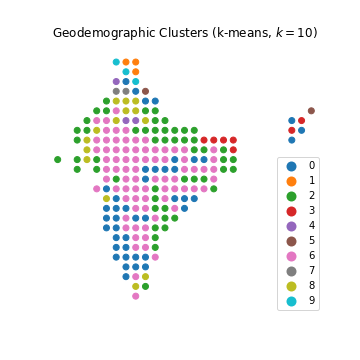

In [23]:
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(5, 5))
# Plot unique values choropleth including a legend and with no boundary lines
K_mean_Ind.plot(column='k5cls', categorical=True, legend=True,  ax=ax)
# Remove axis
ax.set_axis_off()
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title(r'Geodemographic Clusters (k-means, $k=10$)')
# Display the map
plt.show()

In [24]:
#China 

In [25]:
K_mean_IND_DF_2 = K_mean_IND_DF[K_mean_IND_DF['country'] == " 中国"]
K_mean_Ind =  K_mean_IND_DF_2.drop(columns=['lat','lon','location','country'])
K_means_Ind_D = K_mean_Ind.drop(columns=['geometry'])
kmeans = KMeans(n_clusters=10)
numpy.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(K_means_Ind_D)
K_mean_Ind['k5cls'] = k5cls.labels_
K_mean_Ind = GeoDataFrame(K_mean_Ind)


<IPython.core.display.Javascript object>


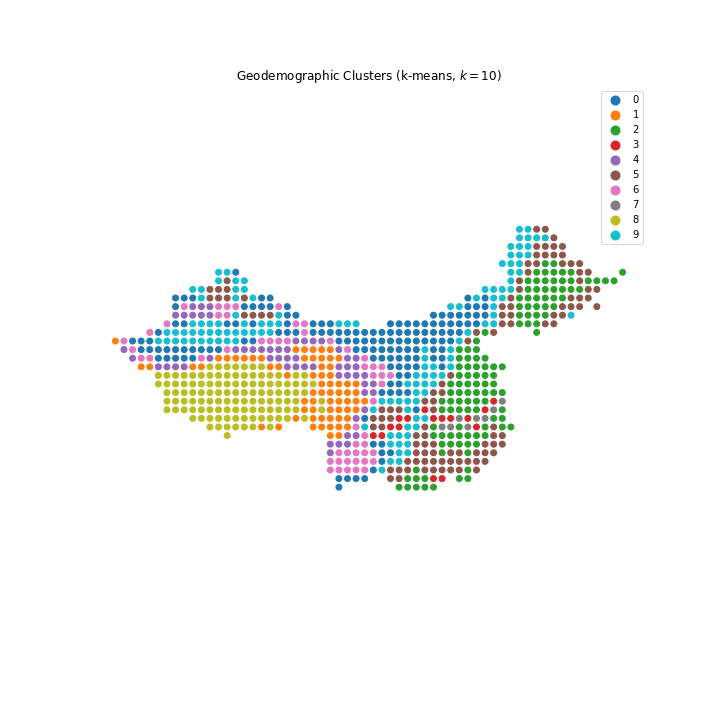

In [26]:
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(10, 10))
# Plot unique values choropleth including a legend and with no boundary lines
K_mean_Ind.plot(column='k5cls', categorical=True, legend=True,  ax=ax)
# Remove axis
ax.set_axis_off()
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title(r'Geodemographic Clusters (k-means, $k=10$)')
# Display the map
plt.show()

In [27]:
#USA

In [28]:
K_mean_IND_DF_2 = K_mean_IND_DF[K_mean_IND_DF['country'] == " United States"]
K_mean_Ind =  K_mean_IND_DF_2.drop(columns=['lat','lon','location','country'])
K_means_Ind_D = K_mean_Ind.drop(columns=['geometry'])
kmeans = KMeans(n_clusters=10)
numpy.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(K_means_Ind_D)
K_mean_Ind['k5cls'] = k5cls.labels_
K_mean_Ind = GeoDataFrame(K_mean_Ind)


<IPython.core.display.Javascript object>


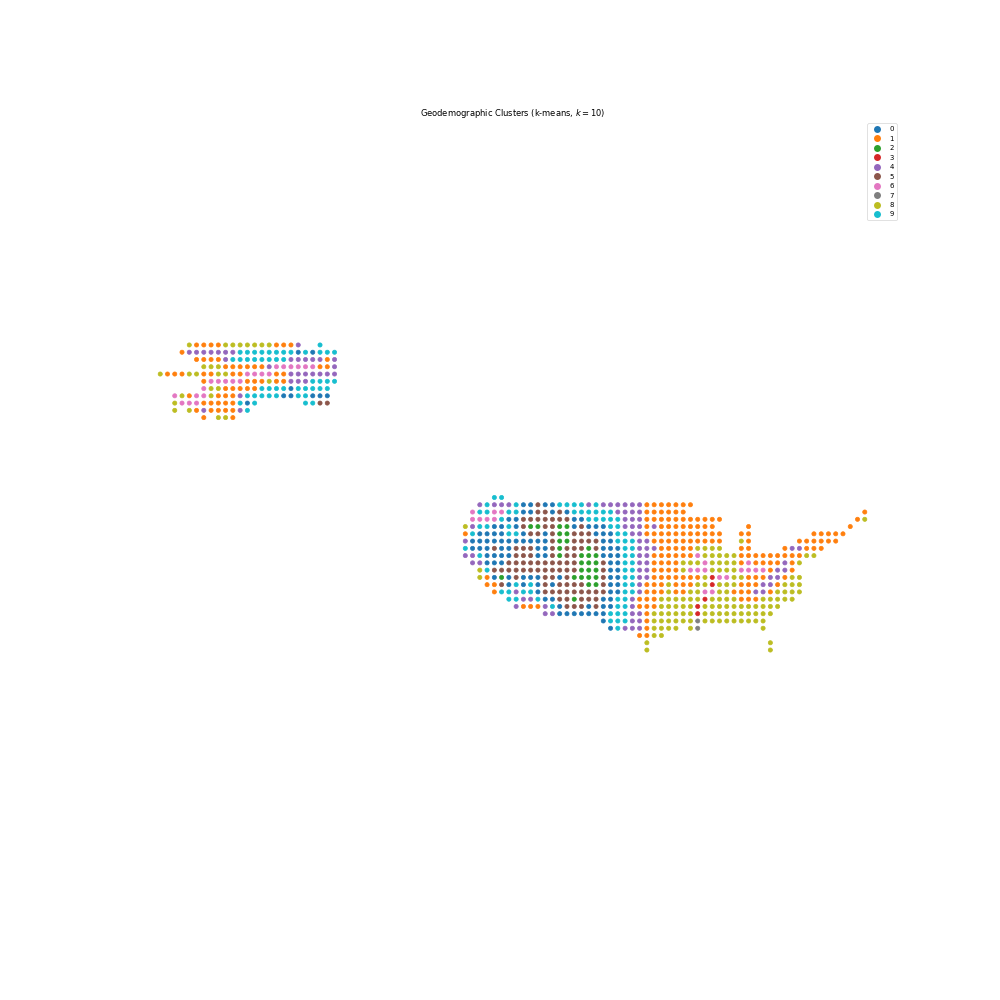

In [32]:
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(20, 20), dpi =50)
# Plot unique values choropleth including a legend and with no boundary lines
K_mean_Ind.plot(column='k5cls', categorical=True, legend=True,  ax=ax)
# Remove axis
ax.set_axis_off()
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title(r'Geodemographic Clusters (k-means, $k=10$)')
# Display the map
plt.show()

## Canada 

In [ ]:
K_mean_IND_DF_2 = K_mean_IND_DF[K_mean_IND_DF['country'] == " Canada"]
K_mean_Ind =  K_mean_IND_DF_2.drop(columns=['lat','lon','location','country'])
K_means_Ind_D = K_mean_Ind.drop(columns=['geometry'])
kmeans = KMeans(n_clusters=3)
numpy.random.seed(1234)

k5cls = kmeans.fit(K_means_Ind_D)
K_mean_Ind['k5cls'] = k5cls.labels_
K_mean_Ind = GeoDataFrame(K_mean_Ind)


<IPython.core.display.Javascript object>


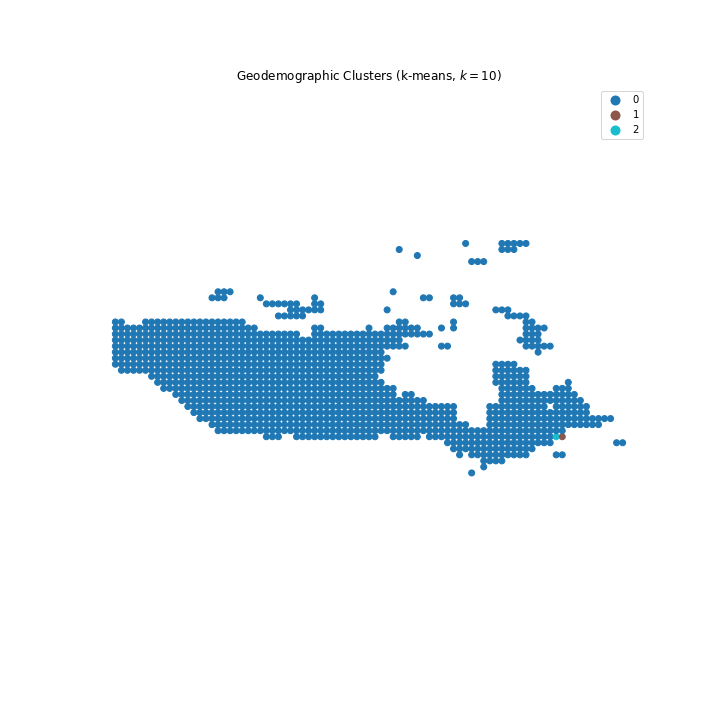

In [37]:
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(10, 10))
# Plot unique values choropleth including a legend and with no boundary lines
K_mean_Ind.plot(column='k5cls', categorical=True, legend=True,  ax=ax)
# Remove axis
ax.set_axis_off()
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title(r'Geodemographic Clusters (k-means, $k=10$)')
# Display the map
plt.show()

## Deutschland

In [41]:

K_mean_IND_DF_2 = K_mean_IND_DF[K_mean_IND_DF['country'] == " Deutschland"]
K_mean_Ind =  K_mean_IND_DF_2.drop(columns=['lat','lon','location','country'])
K_means_Ind_D = K_mean_Ind.drop(columns=['geometry'])
kmeans = KMeans(n_clusters=5)
numpy.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(K_means_Ind_D)

K_mean_Ind['k5cls'] = k5cls.labels_
K_mean_Ind = GeoDataFrame(K_mean_Ind)


<IPython.core.display.Javascript object>


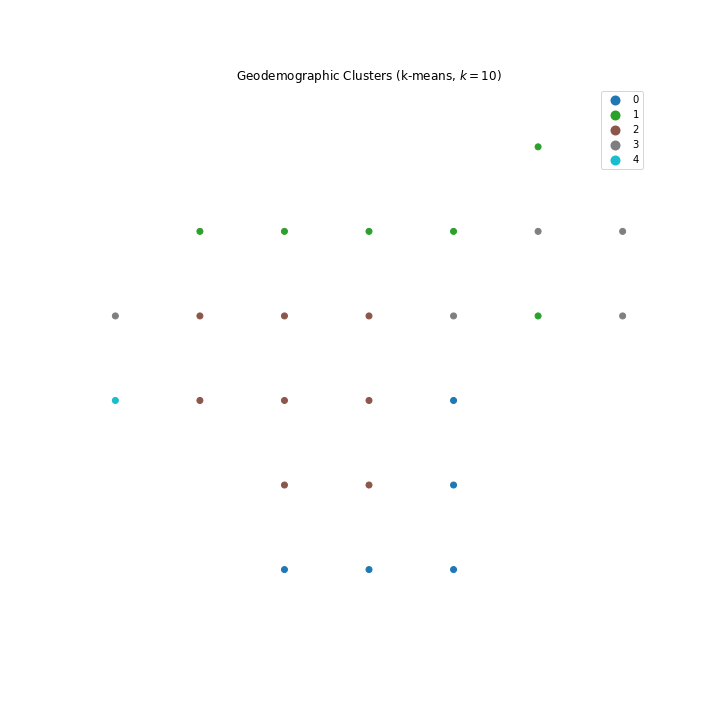

In [42]:
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(10, 10))
# Plot unique values choropleth including a legend and with no boundary lines
K_mean_Ind.plot(column='k5cls', categorical=True, legend=True,  ax=ax)
# Remove axis
ax.set_axis_off()
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title(r'Geodemographic Clusters (k-means, $k=10$)')
# Display the map
plt.show()

In [ ]:
##Russian

In [55]:
K_mean_IND_DF_2 = K_mean_IND_DF[K_mean_IND_DF['country'] == " Россия"]
K_mean_Ind =  K_mean_IND_DF_2.drop(columns=['lat','lon','location','country'])
K_means_Ind_D = K_mean_Ind.drop(columns=['geometry'])
kmeans = KMeans(n_clusters=5)
numpy.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(K_means_Ind_D)

K_mean_Ind['k5cls'] = k5cls.labels_
K_mean_Ind = GeoDataFrame(K_mean_Ind)

<ipython-input-55-7b36a41ff637>:7: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  k5cls = kmeans.fit(K_means_Ind_D)


<IPython.core.display.Javascript object>


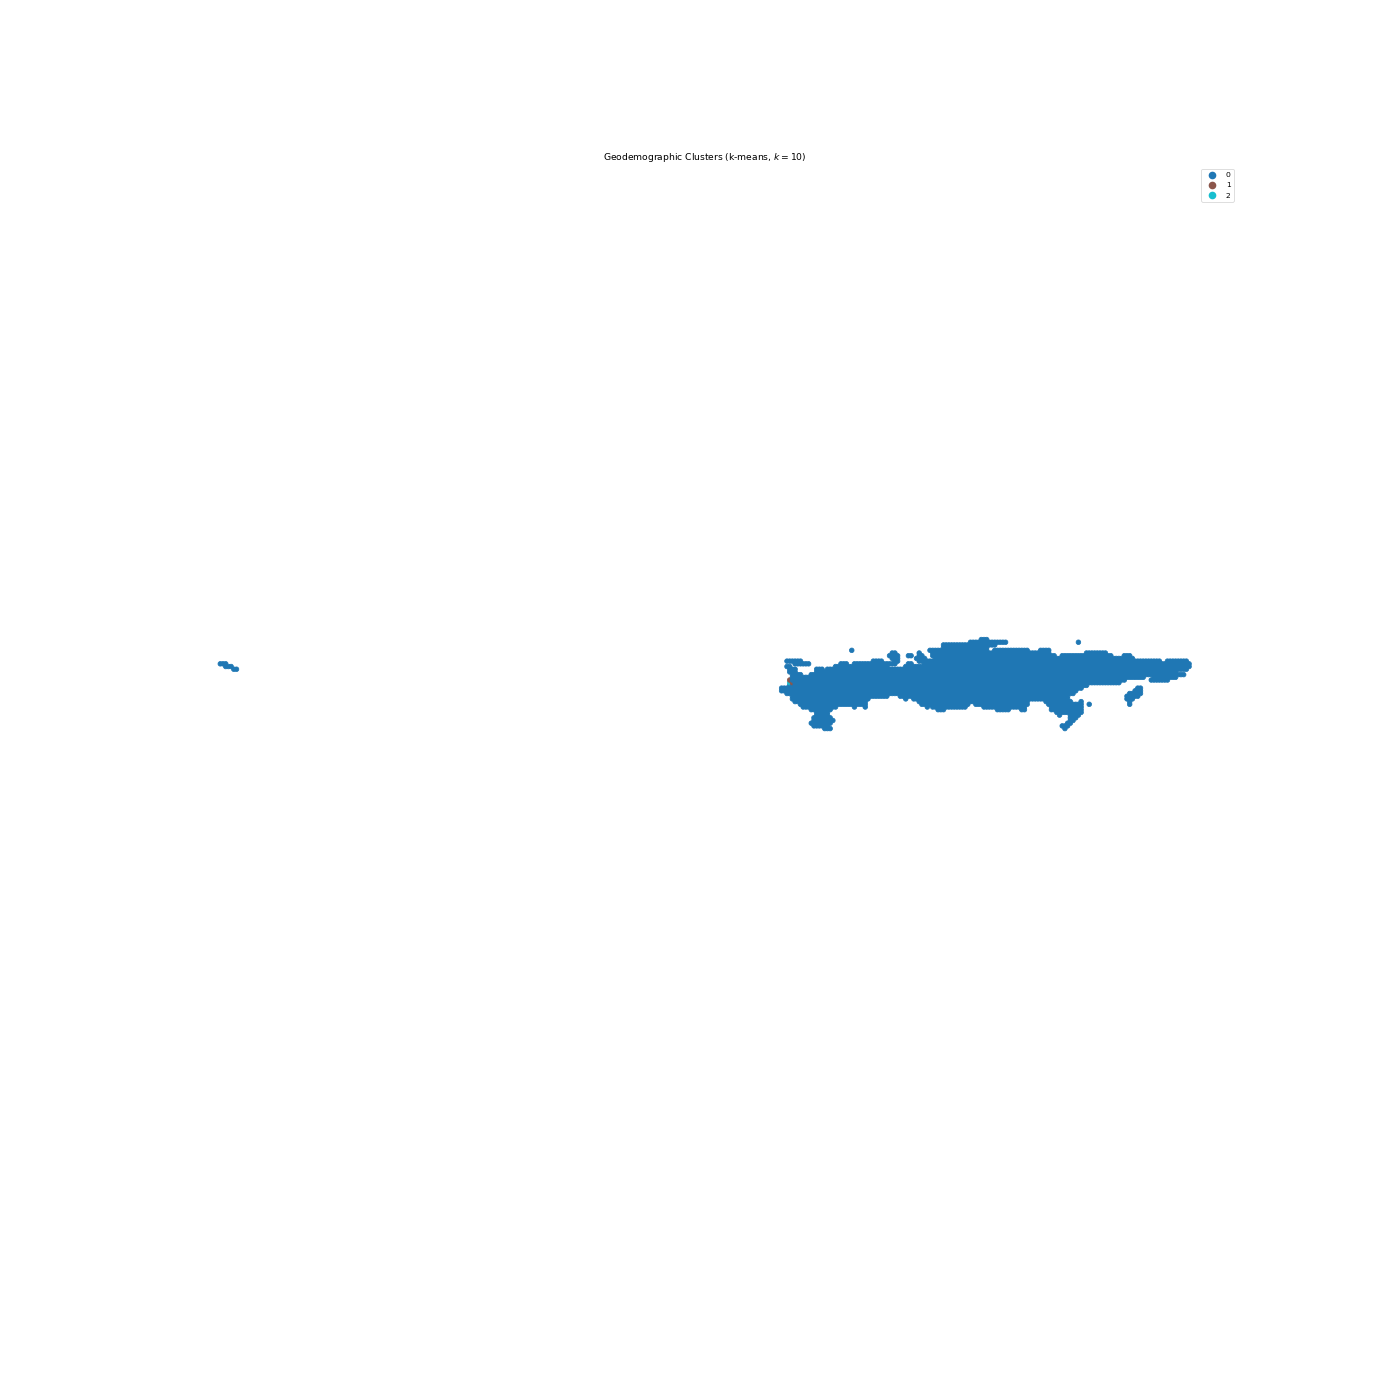

In [57]:
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(25, 25),dpi = 50)
# Plot unique values choropleth including a legend and with no boundary lines
K_mean_Ind.plot(column='k5cls', categorical=True, legend=True,  ax=ax)
# Remove axis
ax.set_axis_off()
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title(r'Geodemographic Clusters (k-means, $k=10$)')
# Display the map
plt.show()

In [ ]:
##Brasil

In [52]:
K_mean_IND_DF_2 = K_mean_IND_DF[K_mean_IND_DF['country'] == " Brasil"]
K_mean_Ind =  K_mean_IND_DF_2.drop(columns=['lat','lon','location','country'])
K_means_Ind_D = K_mean_Ind.drop(columns=['geometry'])
kmeans = KMeans(n_clusters=10)
numpy.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(K_means_Ind_D)

K_mean_Ind['k5cls'] = k5cls.labels_
K_mean_Ind = GeoDataFrame(K_mean_Ind)

<IPython.core.display.Javascript object>


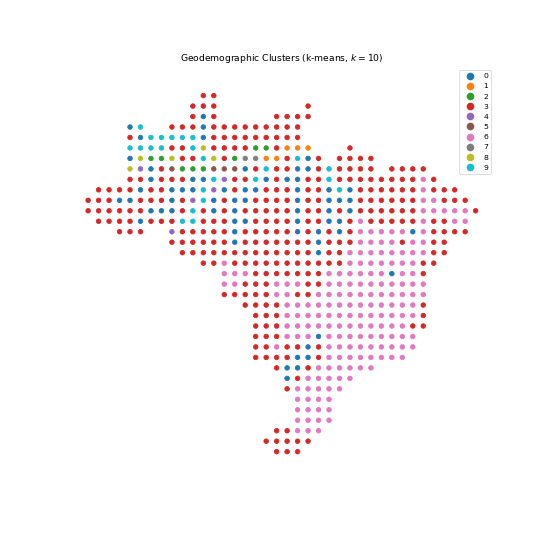

In [53]:
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(10, 10),dpi = 50)
# Plot unique values choropleth including a legend and with no boundary lines
K_mean_Ind.plot(column='k5cls', categorical=True, legend=True,  ax=ax)
# Remove axis
ax.set_axis_off()
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title(r'Geodemographic Clusters (k-means, $k=10$)')
# Display the map
plt.show()

In [ ]:
##Australia

In [58]:
K_mean_IND_DF_2 = K_mean_IND_DF[K_mean_IND_DF['country'] == " Australia"]
K_mean_Ind =  K_mean_IND_DF_2.drop(columns=['lat','lon','location','country'])
K_means_Ind_D = K_mean_Ind.drop(columns=['geometry'])
kmeans = KMeans(n_clusters=10)
numpy.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(K_means_Ind_D)

K_mean_Ind['k5cls'] = k5cls.labels_
K_mean_Ind = GeoDataFrame(K_mean_Ind)

<IPython.core.display.Javascript object>


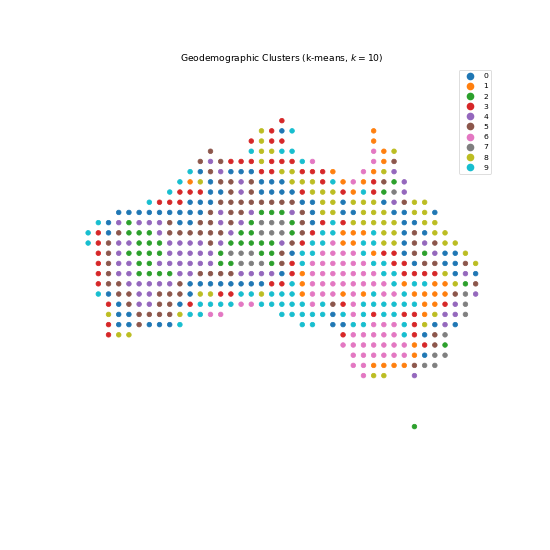

In [59]:
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(10, 10),dpi = 50)
# Plot unique values choropleth including a legend and with no boundary lines
K_mean_Ind.plot(column='k5cls', categorical=True, legend=True,  ax=ax)
# Remove axis
ax.set_axis_off()
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title(r'Geodemographic Clusters (k-means, $k=10$)')
# Display the map
plt.show()

In [ ]:
#Clustering only Watergap and SSP2 country specific 

In [ ]:
##Loading only SSP2 and Watergap

In [60]:
def load_checkpoint2():
    with open('ssp2_watergap_df.pickle', 'rb') as handle:
        return pickle.load(handle)

# Do not uncomment this unless you want to save a new version of the master dataframe
# save_checkpoint(master_df)

master_df2 = load_checkpoint2()

C:\Users\venka\AppData\Roaming\Python\Python38\site-packages\pyproj\crs\crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


In [ ]:
##All data clustering

In [61]:

K_mean = pd.DataFrame(master_df2)
K_mean =  K_mean.drop(columns=['lat','lon'])
K_means_D = K_mean.drop(columns=['geometry'])


kmeans = KMeans(n_clusters=15)
numpy.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(K_means_D)
k5cls.labels_



<ipython-input-61-24c499571623>:9: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  k5cls = kmeans.fit(K_means_D)


array([0, 0, 0, ..., 0, 0, 0])

<IPython.core.display.Javascript object>


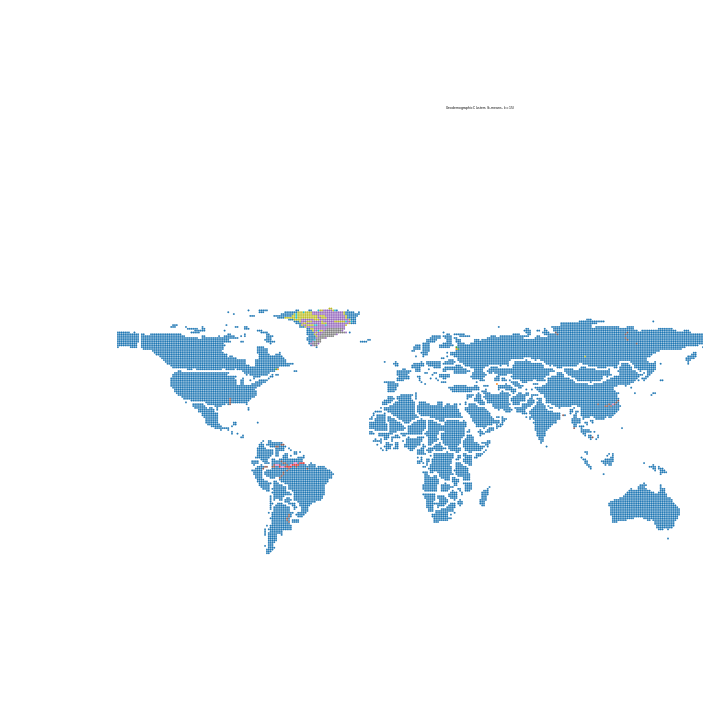

In [64]:
# Assign labels into a column
K_mean['k5cls'] = k5cls.labels_
K_mean = GeoDataFrame(K_mean)
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(50, 50), dpi = 25)
# Plot unique values choropleth including a legend and with no boundary lines
K_mean.plot(column='k5cls', categorical=True, legend=True,  ax=ax)
# Remove axis
ax.set_axis_off()
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title(r'Geodemographic Clusters (k-means, $k=15$)')
# Display the map
plt.show()

In [ ]:
# All year Clusters Country Specific

In [ ]:
##USA

In [72]:
K_mean_c = pd.DataFrame(master_df2)
K_mean_c['country']=K_mean_IND_DF['country']

#USA 
K_mean_c2= K_mean_c[K_mean_c['country'] == " United States"]
K_mean_c2 =  K_mean_c2.drop(columns=['lat','lon','country'])
K_means_c2_D = K_mean_c2.drop(columns=['geometry'])
kmeans = KMeans(n_clusters=10)
numpy.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(K_means_c2_D)
K_mean_c2['k5cls'] = k5cls.labels_
K_mean_c2 = GeoDataFrame(K_mean_c2)


<IPython.core.display.Javascript object>


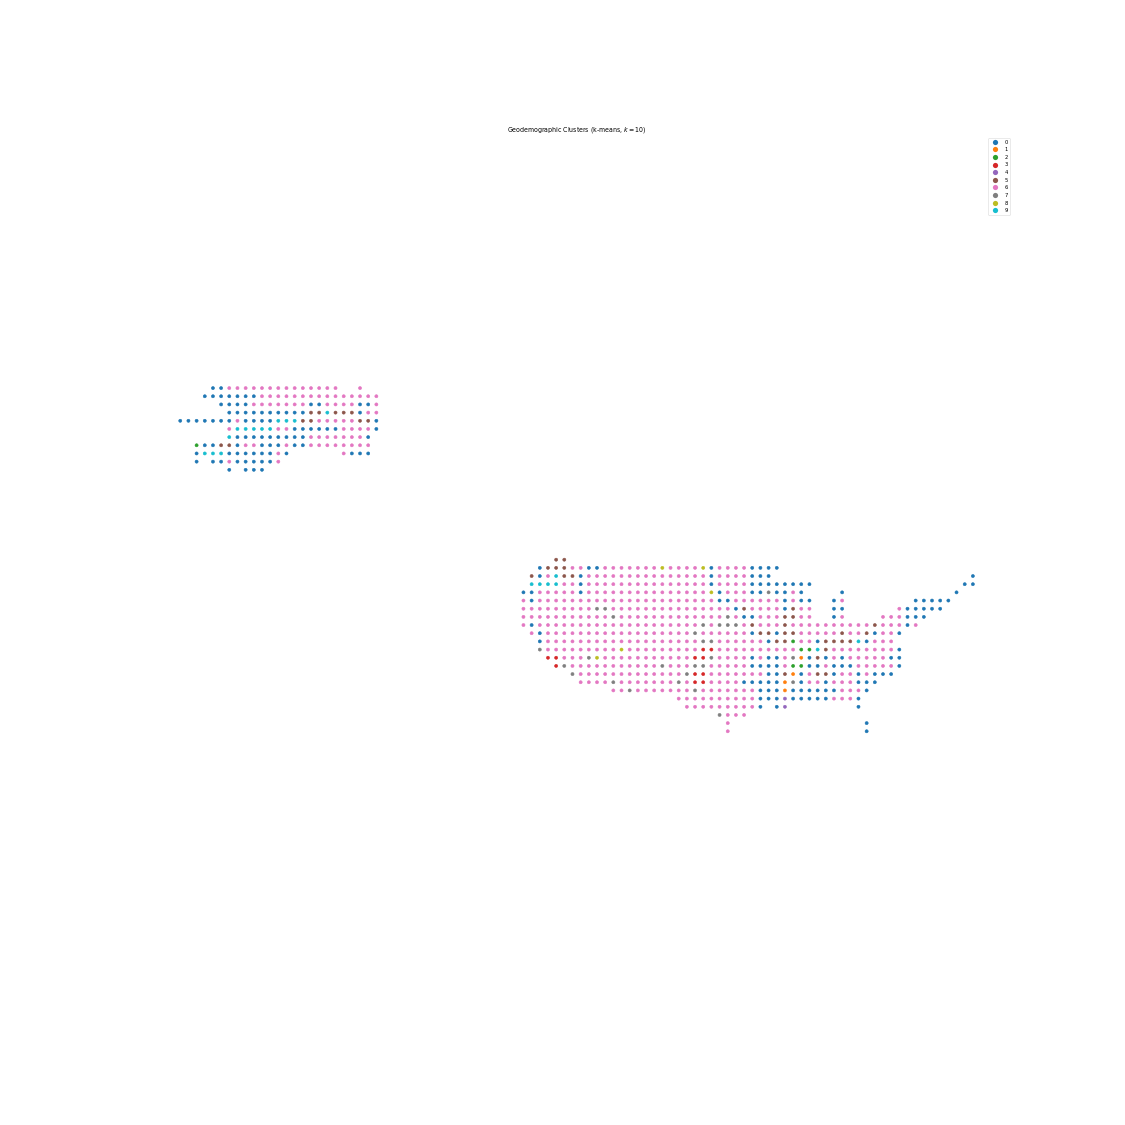

In [74]:
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(30, 30), dpi =50)
# Plot unique values choropleth including a legend and with no boundary lines
K_mean_c2.plot(column='k5cls', categorical=True, legend=True,  ax=ax)
# Remove axis
ax.set_axis_off()
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title(r'Geodemographic Clusters (k-means, $k=10$)')
# Display the map
plt.show()

In [ ]:
#USA analysis:-

In [ ]:
##Brasil

In [77]:
K_mean_c2= K_mean_c[K_mean_c['country'] == " Brasil"]
K_mean_c2 =  K_mean_c2.drop(columns=['lat','lon','country'])
K_means_c2_D = K_mean_c2.drop(columns=['geometry'])
kmeans = KMeans(n_clusters=5)
numpy.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(K_means_c2_D)
K_mean_c2['k5cls'] = k5cls.labels_
K_mean_c2 = GeoDataFrame(K_mean_c2)

<IPython.core.display.Javascript object>


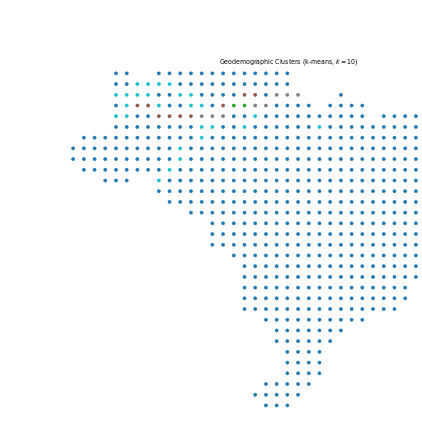

In [78]:
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(15, 15), dpi =50)
# Plot unique values choropleth including a legend and with no boundary lines
K_mean_c2.plot(column='k5cls', categorical=True, legend=True,  ax=ax)
# Remove axis
ax.set_axis_off()
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title(r'Geodemographic Clusters (k-means, $k=10$)')
# Display the map
plt.show()

In [85]:
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_seq_items = 2000
K_mean_c['country'].value_counts()

 Россия               2452
 Canada               1121
 United States         884
 中国                    819
 Brasil                606
                      ... 
Canada                   1
 Bénin                   1
 Guinea Ecuatorial       1
 Cuba                    1
 조선민주주의인민공화국             1
Name: country, Length: 130, dtype: int64